``
This the code for the preparatory task.
I am taking the cifar-10 dataset
``

## Load the data

In [13]:
import numpy as np

file_names = []
files = []

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


for i in range(1,6):
    file = f"data_batch_{i}"
    file_names.append(file)

file_names.append("test_batch")

for file in file_names:
    cifar10_dict = unpickle(file)
    files.append(cifar10_dict)

n_of_files = len(file_names)







## Inspect the list `files`
* In this list i have 6 dictionaries
* Below i get to see the keys from all the dictionaries

In [14]:
for i in range(n_of_files):
    print(f"Dictionary {file_names[i]}: \nKeys: {files[i].keys()}\nBatch label: {files[i][b'batch_label']}\nData size: {files[i][b'data'].shape} \n")

Dictionary data_batch_1: 
Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Batch label: b'training batch 1 of 5'
Data size: (10000, 3072) 

Dictionary data_batch_2: 
Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Batch label: b'training batch 2 of 5'
Data size: (10000, 3072) 

Dictionary data_batch_3: 
Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Batch label: b'training batch 3 of 5'
Data size: (10000, 3072) 

Dictionary data_batch_4: 
Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Batch label: b'training batch 4 of 5'
Data size: (10000, 3072) 

Dictionary data_batch_5: 
Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Batch label: b'training batch 5 of 5'
Data size: (10000, 3072) 

Dictionary test_batch: 
Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Batch label: b'testing batch 1 of 1'
Data size: (10000, 3072) 



## Since i have the contents of the cifar10, i am keeping only the data and the labels

In [15]:
for i in range(n_of_files):
    #use try except because if i try to run this cell alone, an error will occur, because i have already deleted these keys
    try:
        del files[i][b'batch_label']
        del files[i][b'filenames']
    except KeyError:
        print("These keys have already been deleted!\nRun all the cells again")
        pass
    print(f"Dictionary {file_names[i]}: \nKeys: {files[i].keys()}\n")

    

    

Dictionary data_batch_1: 
Keys: dict_keys([b'labels', b'data'])

Dictionary data_batch_2: 
Keys: dict_keys([b'labels', b'data'])

Dictionary data_batch_3: 
Keys: dict_keys([b'labels', b'data'])

Dictionary data_batch_4: 
Keys: dict_keys([b'labels', b'data'])

Dictionary data_batch_5: 
Keys: dict_keys([b'labels', b'data'])

Dictionary test_batch: 
Keys: dict_keys([b'labels', b'data'])



## Create the X_train, y_train, X_test, y_test

In [16]:
#create X_train, y_train, X-test, y_test
X_train = np.full((50000,3072),0,dtype=int)
X_test = np.full((10000,3072),0,dtype=int)
y_train = np.full((50000,),0,dtype=int)
y_test = np.full((10000,),0,dtype=int)

for i in range(n_of_files):
    if i != 5:
        #this is the X_train, y_train
        X_train[i*10000:(i+1)*10000,:] = files[i][b'data']
        y_train[i*10000:(i+1)*10000] = files[i][b'labels']
    else:
        #i have just finished X_train, y_train
        print(f"Shape X_train: {X_train.shape}\nShape y_train: {y_train.shape}")
        #this is the X_test, y_test
        X_test[:,:] = files[i][b'data']
        y_test[:] = files[i][b'labels']
        print(f"Shape X_test: {X_test.shape}\nShape y_test: {y_test.shape}\n")




Shape X_train: (50000, 3072)
Shape y_train: (50000,)
Shape X_test: (10000, 3072)
Shape y_test: (10000,)



## Preprocessing the data

- `fit_transform` is used on `X_train` to calculate the mean and standard deviation of the training data (this is the "fit" part).
It then scales `X_train` using those calculated values (this is the "transform" part).

- The `transform` only applies the previously computed mean and standard deviation (from X_train) to scale X_test.
This step is crucial to ensure that X_test is scaled in the same way as X_train, maintaining consistency between datasets.
If you used `fit_transform` on X_test, it would calculate a new mean and standard deviation just for the test set, causing the training and test data to be on different scales, which would lead to unreliable results.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Feature scaling
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


#PCA

pca = PCA(n_components=100)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



#adding gaussian noise to the dataset
noise_factor = 0.1  # Adjust the noise level as needed
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=2.0, size=X_train.shape)


X_train_combined = np.concatenate((X_train,X_train_noisy),axis=0)

y_train_combined = np.concatenate((y_train,y_train),axis=0)   #i am putting the same array twice  

## Try to visualize the data (didnt work)

But this wont give me a better accuracy because , reducing the dimensions even more wont result in more accuracy.
I think that the only way is to put nooise in my data, so the dataset is bigger

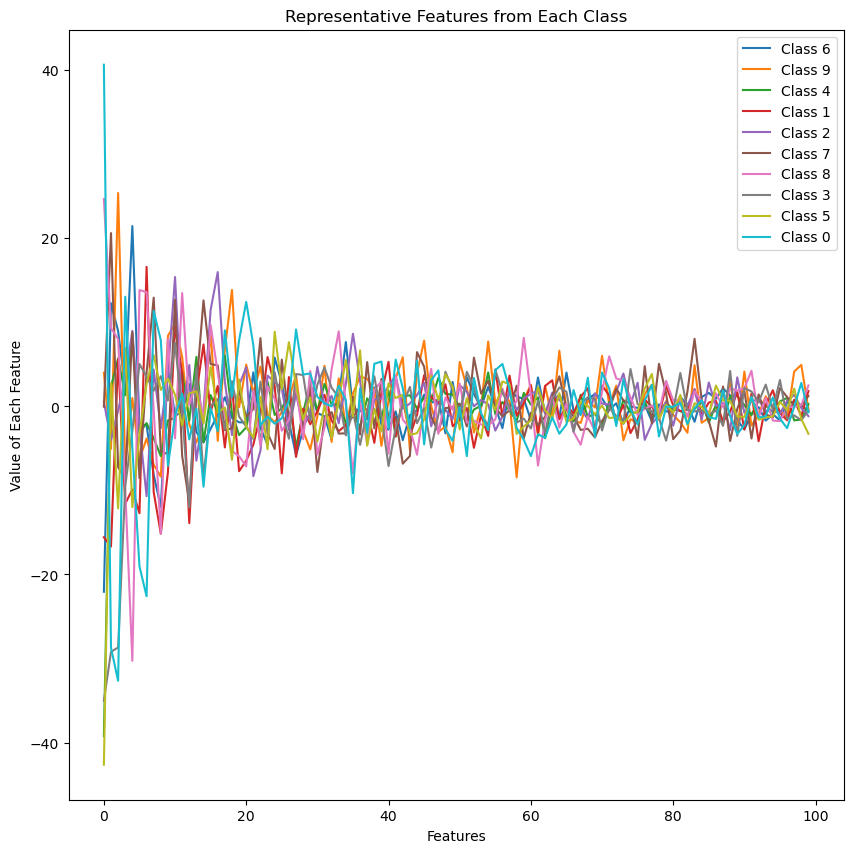

In [18]:
# i am going to take 1 representative from each classes
# # i am thinking that since two objects belong in the same class their feautures should be identical

import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
classes_seen = []
represent_class = []
index = 0
next_class = 0

# Collect one representative from each class
while len(classes_seen) != 10:
    if y_train[index] not in classes_seen:  # Check if class is already seen
        classes_seen.append(y_train[index])
        represent_class.append(X_train[index])
    index += 1

represent_class = np.array(represent_class)

# Plot the features for each representative class
fig_1_3 = plt.figure(figsize=(10, 10))
plt.xlabel("Features")
plt.ylabel("Value of Each Feature")
plt.title("Representative Features from Each Class")

# Loop through and plot each representative
for i in range(represent_class.shape[0]):
    plt.plot(represent_class[i], label=f'Class {classes_seen[i]}')

plt.legend()
plt.show()



    

## Turn train and test data into tensors

In [19]:
import torch
X_train_combined = torch.from_numpy(X_train_combined).type(torch.float)  #important to define the default type for tensors
y_train_combined = torch.from_numpy(y_train_combined).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

X_train_combined[:5,:2], y_train_combined[:5], y_test[:5], X_test[:5,:2]

(tensor([[-22.0557,  12.2849],
         [  4.0135,  -5.0492],
         [ 21.1123, -47.6872],
         [-39.2313,   2.3340],
         [-15.5716, -16.6879]]),
 tensor([6., 9., 9., 4., 1.]),
 tensor([3., 8., 8., 0., 6.]),
 tensor([[-11.3506,   3.4136],
         [ 33.1129, -42.5072],
         [ 11.9410, -35.2011],
         [ 30.2431, -18.6372],
         [-16.7043,  18.7802]]))

## Set up device agnostic code so my model will run on GPU if there is one

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"My model will be running on {device}")

My model will be running on cuda


## Implement 1NN

* Each batch file has the `data` and the `labels`
* `Data` is a 10000(images) x 3072(rgb) matrix 
* `Labels` is a list with 10000 elements, each one corresponds to an image

* So the concept is this:
``
I am working in the 3072 dimensional space and i have seen all the training batches.
The new image will use the KNN to find the K nearest images, using a defined metric (Euklideian Distance,cosine,...)
Then the majority class (label) between the K nearest images will be the class (label) of the new image 
`` 



In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the model: init 1-NN
# !!!!!!!!!!!!!!!!!!!!!! Find out what cosine metric extually does !!!!!!!!!!!!!!!!!!!!!!!!!!
classifier_1NN = KNeighborsClassifier(n_neighbors=1,weights="distance",metric="cosine")  #i noticed that with the cosine metric, the accuracy is higher than with the euclidean

# Train the model
# Only the training batches

classifier_1NN.fit(X_train_combined,y_train_combined)

# Predict the test set results
# predict the labels from the test batch data

y_pred_labels = classifier_1NN.predict(X_test)
# y_test_labels = files[n_of_files-1][b'labels']

# Evaluate the model using accuracy (y_pred_labels == y_test) / number of tests
# number of tests = 10k

print(f"Accuracy of 1-NN: {accuracy_score(y_test,y_pred_labels)}")

Accuracy of 1-NN: 0.4246


## Implement the 3NN

In [45]:
# Define the model: init 3-NN
classifier_3NN = KNeighborsClassifier(n_neighbors=3,weights="distance",metric="cosine")  #i noticed that with the cosine metric, the accuracy is higher than with the euclidean

# Train the model
# Only the training batches

classifier_3NN.fit(X_train_combined,y_train_combined)

# Predict the test set results
# predict the labels from the test batch data

y_pred_labels = classifier_3NN.predict(X_test)

# Evaluate the model using accuracy (y_pred_labels == y_test_labels) / number of tests
# number of tests = 10k

print(f"Accuracy of 3-NN: {accuracy_score(y_test,y_pred_labels)}")

Accuracy of 3-NN: 0.4242


I have tried many different things:
* `KNeighborsClassifier(n_neighbors=k,weights="distance",metric="cosine")` ~ 0.35
* `KNeighborsClassifier(n_neighbors=k,metric="cosine")` ~ 0.345
* `KNeighborsClassifier(n_neighbors=k,metric="euclidean")` ~ 0.29
* used all the other metrics: `cityblock`, `haversine`, `l1`, `l2`, `manhattan`, `nan_euclidean` < 0.35.
* (`manhattan` = `minkowski` for p=1 and `euclidean` is `minkowski` for p = 2)

* Also i used `weights = "distance"` and i got a slightly better accuracy. This means that neighbors that are nearer to the query point will have a greater influence on the predicted class
The default value is `weights = "uniform"` (each neighbor contributes equally to the decision.)

## Implement of Nearest Centroid classifier

In [46]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

classifier_KNC = NearestCentroid(shrink_threshold=1.4)

#training the classifier
classifier_KNC.fit(X_train_combined,y_train_combined)

y_preds_labels = classifier_KNC.predict(X_test)

accuracy_score(y_test,y_preds_labels)

0.2772

## Implementing my own KNN

After splitting the dataset into X_train, X_test, y_train, and y_test, the KNN algorithm works as follows:

* For each point in X_test, calculate the distance to all points in X_train.
* Identify the k closest training points based on the computed distances.
* Assign the majority class of these k neighbors to the test point.
* This process repeats for all points in X_test, leading to a classification based on the training data.
  
```
KNN is a lazy learning algorithm, meaning it doesn't explicitly train a model in the traditional sense. Instead, it memorizes the training dataset (X_train and y_train). Thus, the "training" occurs implicitly through the storage of data rather than through a formal training process.
```